In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
from PIL import Image
import re
from wordcloud import WordCloud,STOPWORDS
import webbrowser


In [2]:
def percentage(part,whole):
 return 100*float(part)/float(whole)

In [3]:
consumerKey="nY1KDrJBLz479bm6zewFXDRdn"
consumersecret="wvdDqXUb84M23vIV0KTqoLAHpBhAzj4OSD3Me1poLWauBw5vbd"
accesstoken="1608779552251338760-J3RY4YgElaBs7xNUjFeuQsrzwinHXe"
accesstokensecret="tAdPDkuDQF1qACjOiJM8B0t49USvEN11LAAFbYDTDSRa3"

auth=tweepy.OAuth1UserHandler(consumer_key=consumerKey ,consumer_secret=consumersecret)
auth.set_access_token(accesstoken,accesstokensecret)
api=tweepy.API(auth)

In [4]:
positive=0
negative=0
neutral=0
polarity=0
tweet_list=[]
positive_list=[]
negative_list=[]
searchterm=input("enter keyword/hashtag to serach about:")
noOfsearchterms=int(input("enter how many tweets to anlyse"))
tweets=tweepy.Cursor(api.search_tweets,q=searchterm,lang="en").items(noOfsearchterms)

for tweet in tweets:
    print(tweet.text)
    tweet_list.append(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity

    if(analysis.sentiment.polarity==0):
        
        neutral+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1       

Which morons said Modi govt gave them jobs?
What kind of job? Salary? https://t.co/RrLGGbx3NS
RT @desimojito: Rahul Gandhu : This morning when I got up at night I realised that population of India is 140 crore rupees, aata is sold at…
RT @GitaSKapoor_: #SunielShetty and his bollywood clan should know
1 - Yogi/Modi have never called for boycott of movies.
2 - We boycott mo…
RT @desimojito: Rahul Gandhu : This morning when I got up at night I realised that population of India is 140 crore rupees, aata is sold at…
RT @SRKkiSoni: Best wishes to N Modi . https://t.co/J1ttjtHj5Q
RT @JaipurDialogues: Many were saying there is No Impact of #BoycottBollywood 
Look at Sunil Shetty begging Yogi Maharaj to speak to Modi J…
RT @JaipurDialogues: Many were saying there is No Impact of #BoycottBollywood 
Look at Sunil Shetty begging Yogi Maharaj to speak to Modi J…
RT @madhukishwar: #Modi Govt’s Response to #Islamification of #Himalayas

@RituRathaur &amp; @AnkurSharma_Adv LIVE with Madhu Kishwar

7 J

In [5]:
positiveperecent=percentage(positive,noOfsearchterms)
negativeperecent=percentage(negative,noOfsearchterms)
neutralperecent=percentage(neutral,noOfsearchterms)
polarity=percentage(polarity,noOfsearchterms)


positiveperecent=format(positiveperecent,'.2f')
negativeperecent=format(negativeperecent,'.2f')
neutralperecent=format(neutralperecent,'.2f')


print(positiveperecent + ' %')
print(negativeperecent + ' %')
print(neutralperecent + ' %')

31.00 %
16.00 %
53.00 %


In [6]:
print('Most common response of people reacting on ' + searchterm + ' by analysisng ' + str(noOfsearchterms) + ' tweets is:')

if(polarity==0 or neutralperecent>positiveperecent and neutralperecent>negativeperecent):
 print('neutral')
elif(polarity<0.00):
 print('negative')
elif(polarity>0.00):
 print('positive')

Most common response of people reacting on modi by analysisng 100 tweets is:
neutral


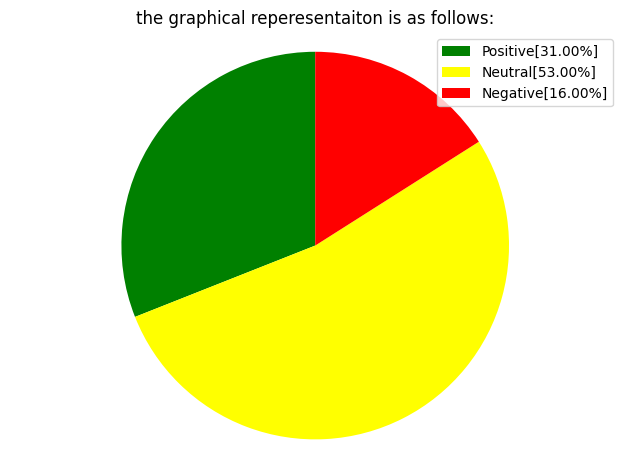

In [7]:

labels=['Positive['+str(positiveperecent)+'%]', 'Neutral['+str(neutralperecent)+'%]', 'Negative['+str(negativeperecent)+'%]']
sizes= [positiveperecent,neutralperecent,negativeperecent]
colors=['green','yellow','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels, loc="best")
plt.title("the graphical reperesentaiton is as follows:")
plt.axis('equal')
plt.tight_layout()

plt.savefig('pie_read.jpg',bbox_inches='tight')
plt.show()

In [8]:
tw_list = pd.DataFrame(tweet_list,columns=['Tweets'])
#tw_list['text'] = tw_list[0]
tw_list.head()


,Tweets
0,Which morons said Modi govt gave them jobs?\nW...
1,RT @desimojito: Rahul Gandhu : This morning wh...
2,RT @GitaSKapoor_: #SunielShetty and his bollyw...
3,RT @desimojito: Rahul Gandhu : This morning wh...
4,RT @SRKkiSoni: Best wishes to N Modi . https:/...


In [9]:
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+', '',text)
    text=re.sub(r'https?:\/\/\s+', '',text)
    text=re.sub(r'https','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'://t','',text)
    return text




In [10]:
tw_list['Tweets']=tw_list['Tweets'].apply(clean) 

print(tw_list)

                                               Tweets
0   Which morons said Modi govt gave them jobs?Wha...
1   : Rahul Gandhu : This morning when I got up at...
2   _: SunielShetty and his bollywood clan should ...
3   : Rahul Gandhu : This morning when I got up at...
4            : Best wishes to N Modi . .co/J1ttjtHj5Q
..                                                ...
95  : Modi Govt to acquire 2 Lithium Mines &amp; 1...
96  : Under the leadership of PM Modi, the value o...
97  :   Modi has truly transformed this country be...
98  : Educationalist and MP Parivendhar avl(also a...
99  : Modi government's strong policies have broke...

[100 rows x 1 columns]


In [11]:
def create_wordcloud(text,im):
     STOPWORDS=['nhttps','RT','l','i','nin','inn','in','https','n','he','she','subjectivity','and','the','by','you','were','time','person','year','way','day','thing','man','life','hand','part','child','eye','woman'
     ,'place','work','week','case','point','government','company','number','group','problem','fact','of','in','to','for','with','on','at','from','about','as','into','like','through','after','over','between','out',
     'against','during','without','before','under','around','among','are','we','can','land','as','is','a','s','them','that','then','which','when','ALE','it','be','ht','will','nare','ji','t','bu','PYC','_PYC','girl','boy','CO']
     stopwords = set(STOPWORDS)
     im1=str(im)
     wc = WordCloud(background_color='black',
     
     max_words=30, 
     stopwords=stopwords,
     repeat=True) 
     wc.generate(str(text)) 
     wc.to_file(im1+'.png') 
     path=im1+'.png'
     print('Word Cloud Saved Successfully') 
     path=display(Image.open(path))

In [12]:
#showing tweets with their subjectivity and polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolariry(text):
  return TextBlob(text).sentiment.polarity

tw_list['subjectivity']=tw_list['Tweets'].apply(getsubjectivity)
tw_list['polarity']=tw_list['Tweets'].apply(getpolariry)


tw_list

,Tweets,subjectivity,polarity
0,Which morons said Modi govt gave them jobs?Wha...,0.950000,-0.100000
1,: Rahul Gandhu : This morning when I got up at...,0.000000,0.000000
2,_: SunielShetty and his bollywood clan should ...,0.000000,0.000000
3,: Rahul Gandhu : This morning when I got up at...,0.000000,0.000000
4,: Best wishes to N Modi . .co/J1ttjtHj5Q,0.300000,1.000000
...,...,...,...
95,: Modi Govt to acquire 2 Lithium Mines &amp; 1...,0.000000,0.000000
96,": Under the leadership of PM Modi, the value o...",0.500000,-0.300000
97,: Modi has truly transformed this country be...,0.500000,0.500000
98,: Educationalist and MP Parivendhar avl(also a...,0.000000,0.000000


In [13]:
def getanalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

tw_list['Analysis']=tw_list['polarity'].apply(getanalysis)
tw_list

,Tweets,subjectivity,polarity,Analysis
0,Which morons said Modi govt gave them jobs?Wha...,0.950000,-0.100000,Negative
1,: Rahul Gandhu : This morning when I got up at...,0.000000,0.000000,Neutral
2,_: SunielShetty and his bollywood clan should ...,0.000000,0.000000,Neutral
3,: Rahul Gandhu : This morning when I got up at...,0.000000,0.000000,Neutral
4,: Best wishes to N Modi . .co/J1ttjtHj5Q,0.300000,1.000000,Positive
...,...,...,...,...
95,: Modi Govt to acquire 2 Lithium Mines &amp; 1...,0.000000,0.000000,Neutral
96,": Under the leadership of PM Modi, the value o...",0.500000,-0.300000,Negative
97,: Modi has truly transformed this country be...,0.500000,0.500000,Positive
98,: Educationalist and MP Parivendhar avl(also a...,0.000000,0.000000,Neutral


In [14]:
j=1
sorteddf=tw_list.sort_values(by=['polarity'])

for i in range(0,sorteddf.shape[0]):
    if sorteddf['Analysis'][i]=='Positive':
     print(str(j) +') '+sorteddf['Tweets'][i])
     print()
     j=j+1

1) : Best wishes to N Modi . .co/J1ttjtHj5Q

2) : Many were saying there is No Impact of BoycottBollywood Look at Sunil Shetty begging Yogi Maharaj to speak to Modi J…

3) : Many were saying there is No Impact of BoycottBollywood Look at Sunil Shetty begging Yogi Maharaj to speak to Modi J…

4) : Modi Govt’s Response to Islamification of Himalayas &amp; _Adv LIVE with Madhu Kishwar7 Januar…

5) : I was mocked by many when I explained PM Modi's strategy to Internationalize Rupee.No problem in that!Now Pls read👇AF…

6) :   Modi has truly transformed this country beyond expectations. Some of the most educated folks s…

7) : India to allow foreign universities such as Oxford, Stanford &amp; Yale to set up campuses in India. A new reform by PM Mo…

8) : PM Modi directs officials to post their best officers in border districts.

9) : India to allow foreign universities such as Oxford, Stanford &amp; Yale to set up campuses in India. A new reform by PM Mo…

10) :  India is being praised all a

In [15]:
j=1
sorteddf=tw_list.sort_values(by=['polarity'])

for i in range(0,sorteddf.shape[0]):
    if sorteddf['Analysis'][i]=='Negative':
     print(str(j) +') '+sorteddf['Tweets'][i])
     print()
     j=j+1

1) Which morons said Modi govt gave them jobs?What kind of job? Salary? .co/RrLGGbx3NS

2) : After being defiant for weeks, the govt has agreed to process a few judicial appointments. But will the govt answer why…

3) _007Club: BIG NEWS:Modi Govt is planning to shut down offices of the United Nations Military Observer Group in the Jammu &amp; Kashmir.

4) : After being defiant for weeks, the govt has agreed to process a few judicial appointments. But will the govt answer why…

5) : After being defiant for weeks, the govt has agreed to process a few judicial appointments. But will the govt answer why…

6) : There is a reason why Rahul Gandhi has no credibility as a political leader. In the last few years, every allegation of hi…

7) : After being defiant for weeks, the govt has agreed to process a few judicial appointments. But will the govt answer why…

8) _bjp: 𝐓𝐫𝐚𝐧𝐬𝐟𝐨𝐫𝐦𝐢𝐧𝐠 𝐑𝐞𝐝 𝐓𝐚𝐩𝐞 𝐢𝐧𝐭𝐨 𝐑𝐞𝐝 𝐂𝐚𝐫𝐩𝐞𝐭!Modi govt's National Single Window System is boosting investments and ensuring ease…

9

Word Cloud Saved Successfully


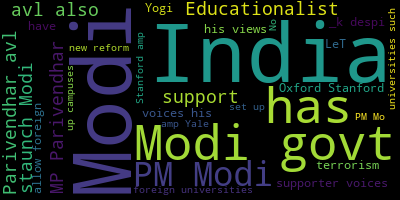

In [16]:
create_wordcloud(tw_list['Tweets'].values,1)


Word Cloud Saved Successfully


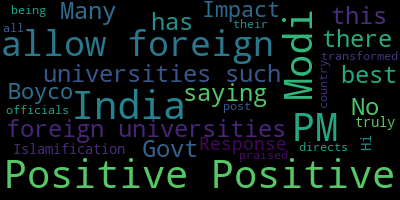

In [17]:
positive_list=tw_list[tw_list['Analysis']=='Positive']
create_wordcloud(positive_list,2)

Word Cloud Saved Successfully


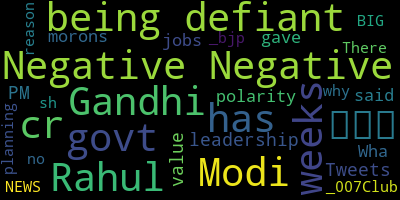

In [18]:
negative_list=tw_list[tw_list['Analysis']=='Negative']
create_wordcloud(negative_list,3)

In [19]:
neutral_list=[]
neutral_list=tw_list[tw_list['Analysis']=='Neutral']

In [20]:
message=[]
value='text'

f=open('4.html','w',encoding='utf-8')
message='''
  <html>
   <div class="parent">
  <img id="image1" src="pie_read.jpg" 
  alt="graph"
  title="pie chart">
  <p1 id='img1'><u>pie chart</u></p>
  <img id="image2" src="1.png"
  alt="comp">
  <p1 id='img2'><u>Word cloud for all tweets</u></p>
  <img id="image3" src="2.png"
  alt="comp">
  <p1 id='img3'><u>Word cloud for positive tweets</u></p>
  <img id="image4" src="3.png"
  alt="comp">
  <p1 id='img4'><u>Word cloud for negative tweets</u></p>
  </div>
  <head>

 
 
  </head>
 <style>
 .red{
  color:lightgreen;
 }
.neg{
  color:red;
}
.neu{
  color:#D1C646;
}
.parent{
  position:relative;
  top:0;
  left=t:0;
}
#image1{
position: relative;
    height: 212px;
    top: 0;
    left: 566px;

    border: 1px solid;
}
#image2{
position: relative;
    height: 188px;
    top: 122px;
    left: 148px;
    border: 1px solid;}

#image3{
position: relative;
    height: 188px;
    top: 135px;
    left: 304px;
    border: 1px solid;}

#image4{
position: relative;
    height: 188px;
    top: 135px;
    left: 294px;
    border: 1px solid;
}

.tex{
  position: relative;
  top:650px;
}

#img1{
  position: relative;
    top: 31px;
    left: 395px;
}

#img2{
  position: relative;
    top: 157px;
    left: -140px;
}



#img3{
 position: relative;
    top: 165px;
    left: 12px;
}

#img4{
  position: relative;
    top: 160;
    left: 2;
}
 </style>
  </html>
  '''
f.write(message)

for tweet in positive_list['Tweets']:
  
  pp=tweet
  html=f"<div class='tex'><ul><p class='red' >{pp}</p></ul></div>"
  f.write(html)

for tweet in negative_list['Tweets']:
  pp=tweet
  html=f"<div class='tex'><ul><p class='neg' >{pp}</p></ul></div>"
  f.write(html)


for tweet in neutral_list['Tweets']:
 pp=tweet
 html=f"<div class='tex'><ul><p class='neu' >{pp}</p></ul></div>"
 f.write(html)
f.close()

filename = 'file:///'+os.getcwd()+'/' + '4.html'
webbrowser.open_new_tab(filename) 

True